## Exercise: Build a logistic regression model to predict fish species

Using the fish dataset in this repo (location relative to this notebook: `../datasets/fish/Fish.csv`) do the following:

1. Split the data into labels and features, with the "species" column being the label and the other columns as features.
2. Split the fish data into training and validation sets.
3. Fit the model!
4. Score the model, what is this value? How should you interpret it?
5. Examine the coefficents and intercept value...
    * These are a strange shape compared to linear regression. 
    * Can you explain what they are?
6. Compute and plot the a "confusion matrix"
    * Hint 1: [https://machinelearningmastery.com/confusion-matrix-machine-learning/](https://machinelearningmastery.com/confusion-matrix-machine-learning/)
    * Hint 2: [https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
    * Hint 3: [https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix](https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix)
    * Is your model good at some classes and bad at others?
    * Are there any interesting trends in the confusion matrix?

In [1]:
# Your code below here... use as many cells as you'd like.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
path_to_fish = '../datasets/fish/Fish.csv'
fish_df = pd.read_csv(path_to_fish)
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay

labels = fish_df['Species']
features = fish_df.drop(columns=['Species'])

# We "hold out" some data to test if our model can work
# on data it wasn't allowed to see during the training process
training_data, test_data, training_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

model = LogisticRegression(max_iter=50000)
model.fit(training_data, training_labels)

# We generally "score" the model based on the held out data, but it's useful to compare 
# the training scores to the test scores to look for "overfitting"ArithmeticError
train_score = model.score(training_data, training_labels)
test_score = model.score(test_data, test_labels)



train: 0.9921259842519685, test: 0.9375
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[ 0.05947115 -0.55827863 -0.35942629  0.91518072  1.34502609 -0.12471929]
 [ 0.07257534 -0.13625651 -0.36294208 -0.72143846  1.43950562 -0.20639052]
 [ 0.08568021  0.76709071  1.35203774 -2.49229902 -1.1155527   0.34440565]
 [ 0.05722378  0.23104351  0.26627364  0.38449282 -0.8862579  -0.3545922 ]
 [ 0.04985457 -0.07574505 -1.25815041  1.10188942 -0.45491641  0.46625055]
 [-0.40459095  0.47544274  0.40456108  0.5243685  -0.05905909 -0.05349843]
 [ 0.07978589 -0.70329676 -0.04235367  0.28780603 -0.26874562 -0.07145575]]
Weight [ 0.05947115 -0.55827863 -0.35942629  0.91518072  1.34502609 -0.12471929]
Length1 [ 0.07257534 -0.13625651 -0.36294208 -0.72143846  1.43950562 -0.20639052]
Length2 [ 0.08568021  0.76709071  1.35203774 -2.49229902 -1.1155527   0.34440565]
Length3 [ 0.05722378  0.23104351  0.26627364  0.38449282 -0.8862579  -0.3545922 ]
Height [ 0.04985457 -0.07574505 -1.25815041  

In [59]:
print(f"train: {train_score}, test: {test_score}")
class_names=training_labels.unique()
print (model.classes_)
print (model.coef_)
print (model.intercept_)

train: 0.9921259842519685, test: 0.9375
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[ 0.05947115 -0.55827863 -0.35942629  0.91518072  1.34502609 -0.12471929]
 [ 0.07257534 -0.13625651 -0.36294208 -0.72143846  1.43950562 -0.20639052]
 [ 0.08568021  0.76709071  1.35203774 -2.49229902 -1.1155527   0.34440565]
 [ 0.05722378  0.23104351  0.26627364  0.38449282 -0.8862579  -0.3545922 ]
 [ 0.04985457 -0.07574505 -1.25815041  1.10188942 -0.45491641  0.46625055]
 [-0.40459095  0.47544274  0.40456108  0.5243685  -0.05905909 -0.05349843]
 [ 0.07978589 -0.70329676 -0.04235367  0.28780603 -0.26874562 -0.07145575]]
[-19.37675083  14.39086557  16.79430868 -21.69776323   5.16762034
   0.05226056   4.66945893]


Confusion matrix, without normalization
[[ 7  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0 14  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  4  1  1]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  1]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         1.         0.         0.         0.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.66666667 0.16666667
  0.16666667]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]]


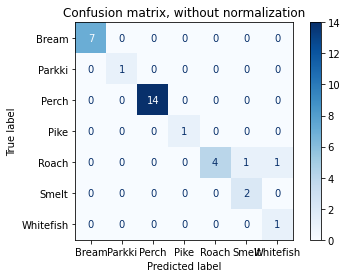

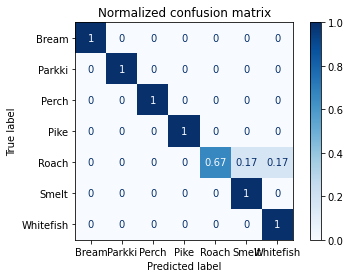

In [53]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        test_data,
        test_labels,
        display_labels=model.classes_,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

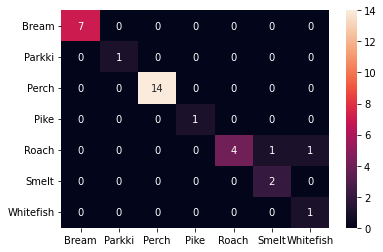

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, model.predict(test_data))
f = sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)

In [ ]:
Precision = "Court/less false positive, MD diagnostinc"
Recall = "Cancer/less false negative, MD screening"